In [17]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# For opening and displaying image
from skimage.data import imread
from skimage.io import imshow

# for convolution and gaussian function
from scipy.signal import gaussian
from scipy.signal import convolve2d

# Detectors
from harris_detector import *
from skimage.feature import corner_harris, corner_peaks

# Transformations
import skimage

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Constant associated with Harris corner detection
kappa = 0.05
sigma_d = 1
sigma_i = 2

# Local window for local minima
local = 1

# Threshold (in percentage of maximal value) for values to keep  after first step of cleaning
threshold = 0.2

# Constants associated with ANMS
c = 0.9
best = 300

In [57]:
def gen_plot(img, save_file = None):
    """
    Given an image, run harris detector points and plot the resulting image
    """
    # Constant associated with Harris corner detection
    kappa = 0.05
    sigma_d = 1
    sigma_i = 5

    # Local window for local minima
    local = 3

    # Threshold (in percentage of maximal value) for values to keep  after first step of cleaning
    threshold = 0.01

    # Constants associated with ANMS
    c = 0.7
    best = 50
    corners = find_harris_corners(
    img,
    sigma_d,
    sigma_i,
    kappa,
    threshold,
    local
    )
#     if anms == True :
#         refined_corners = anms(corners, 50)
#     else:
#         refined_corners = np.argwhere(corners > 0)
    refined_corners = anms(corners, best)
    corners = np.argwhere(corners > 0)
    f, ax = plt.subplots(1,2, figsize = (20, 10));
    ax[0].scatter(corners[:, 1], corners[:, 0], color = 'r', marker= ".", s = 500);
    ax[0].imshow(img, cmap="Greys_r");
    ax[1].scatter(refined_corners[:, 1], refined_corners[:, 0], color = 'r', marker= ".", s = 500);
    ax[1].imshow(img, cmap="Greys_r");
    f.tight_layout();
    ax[0].axis('off')
    ax[1].axis('off')
    if save_file:
        f.savefig("images/" + save_file + ".png")
    print ("Number of corners : {}\nNumber of refined corners : {}".format(len(corners),
                                                                          len(refined_corners)))

In [5]:
A = np.random.rand(5,7)

In [6]:
A

array([[ 0.56260854,  0.26156133,  0.52098936,  0.79285383,  0.84142564,
         0.37102089,  0.60415299],
       [ 0.54083506,  0.31335218,  0.71728116,  0.44017334,  0.38378491,
         0.64158447,  0.93070647],
       [ 0.95003527,  0.87283231,  0.22986303,  0.64124691,  0.8642441 ,
         0.36957606,  0.69365169],
       [ 0.70736345,  0.70959848,  0.38189897,  0.19115449,  0.61500478,
         0.86416074,  0.18815402],
       [ 0.10317933,  0.09039099,  0.78985716,  0.84986941,  0.0598723 ,
         0.16827454,  0.4878398 ]])

In [7]:
A[-3:, :]

array([[ 0.95003527,  0.87283231,  0.22986303,  0.64124691,  0.8642441 ,
         0.36957606,  0.69365169],
       [ 0.70736345,  0.70959848,  0.38189897,  0.19115449,  0.61500478,
         0.86416074,  0.18815402],
       [ 0.10317933,  0.09039099,  0.78985716,  0.84986941,  0.0598723 ,
         0.16827454,  0.4878398 ]])

# Various scenes

## Bouc

In [8]:
bouc = imread('images/bouc.pgm')

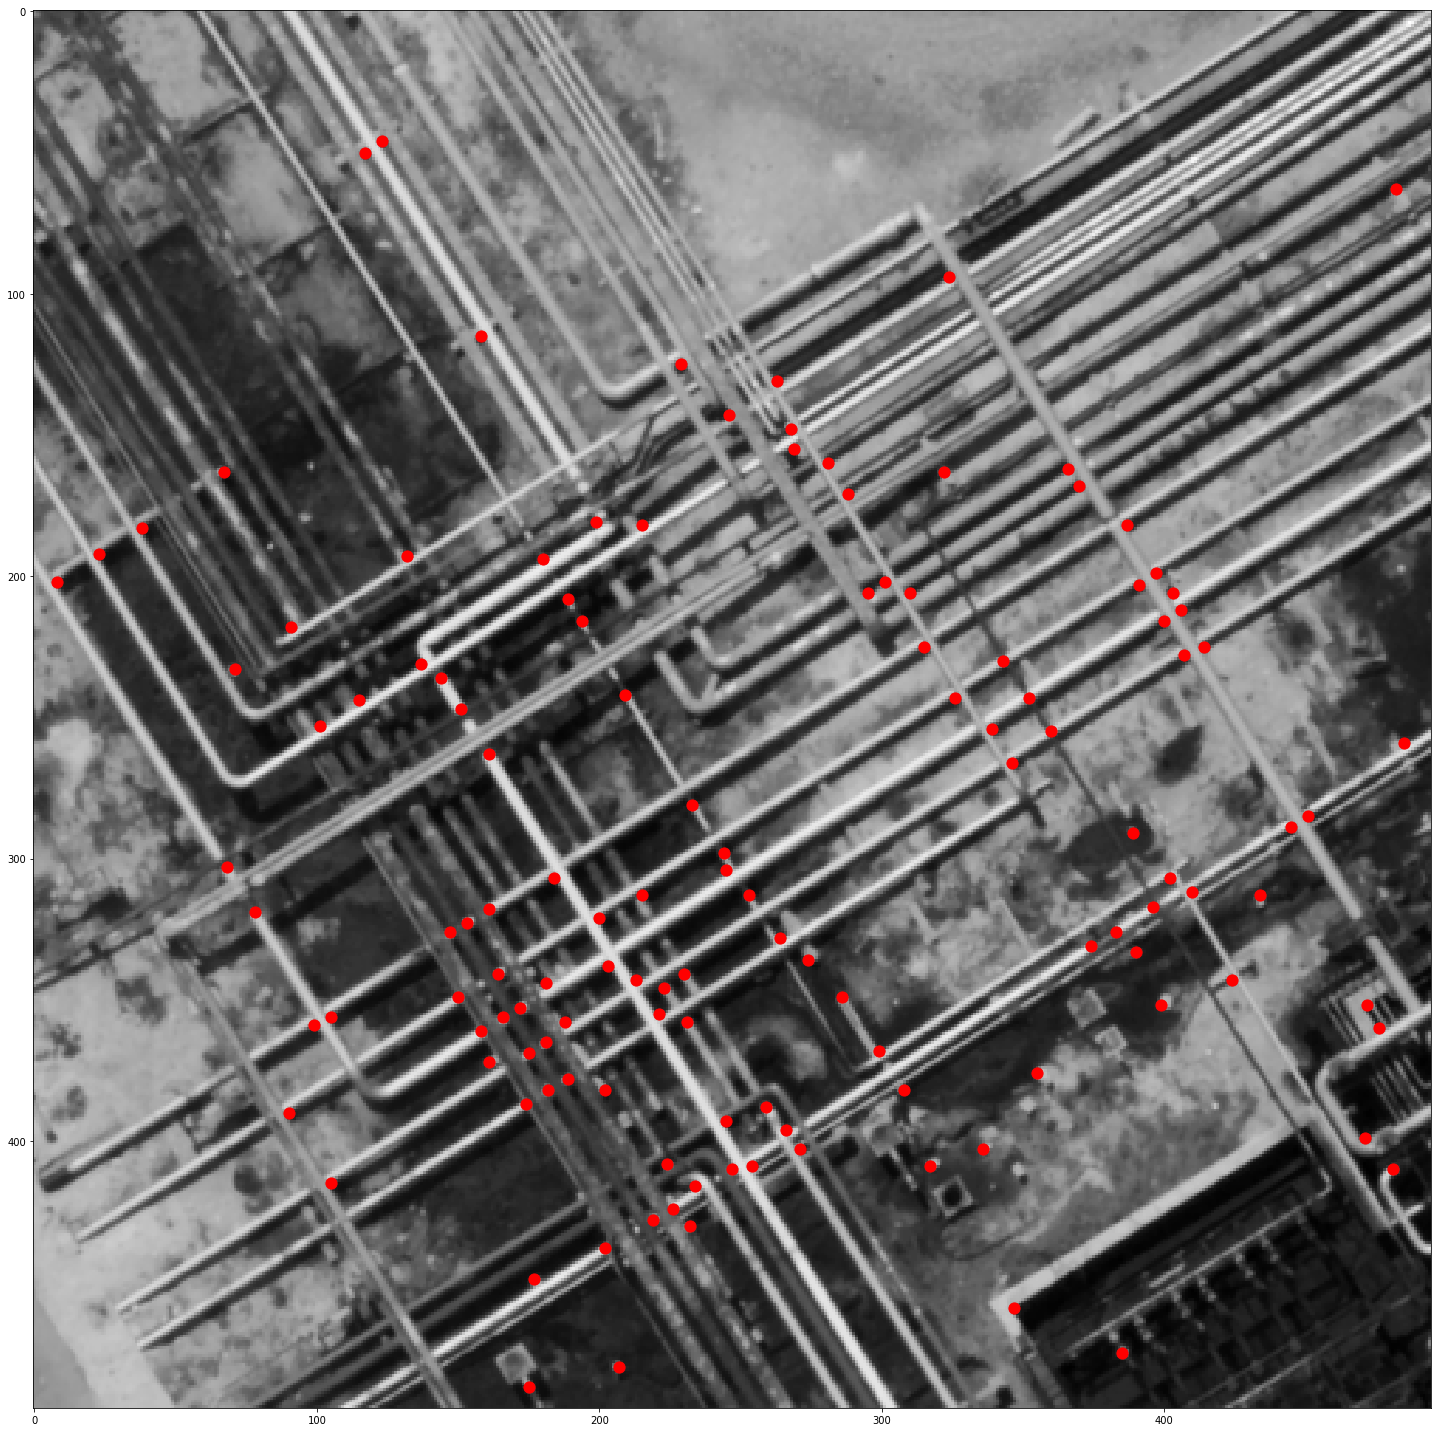

In [9]:
theorical_bouc = corner_peaks(corner_harris(bouc), min_distance = 5);
plt.figure(figsize = (20, 20));
plt.scatter(theorical_bouc[:, 1], theorical_bouc[:, 0], color = 'r', marker= ".", s = 500);
imshow(bouc);

Number of corners : 1265
Number of refined corners : 50


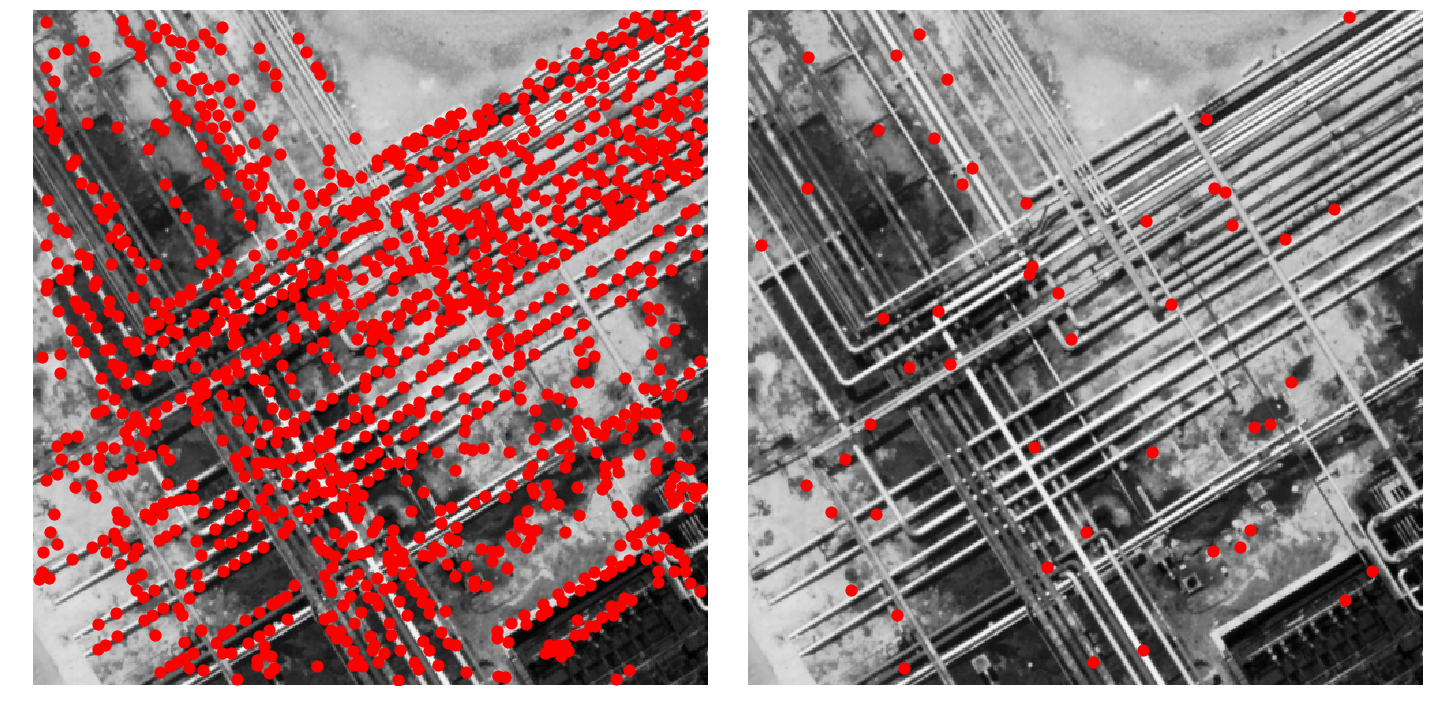

In [40]:
gen_plot(bouc, save_file = "1_bouc")

## Lena

In [11]:
lena = imread('images/lena.pgm')

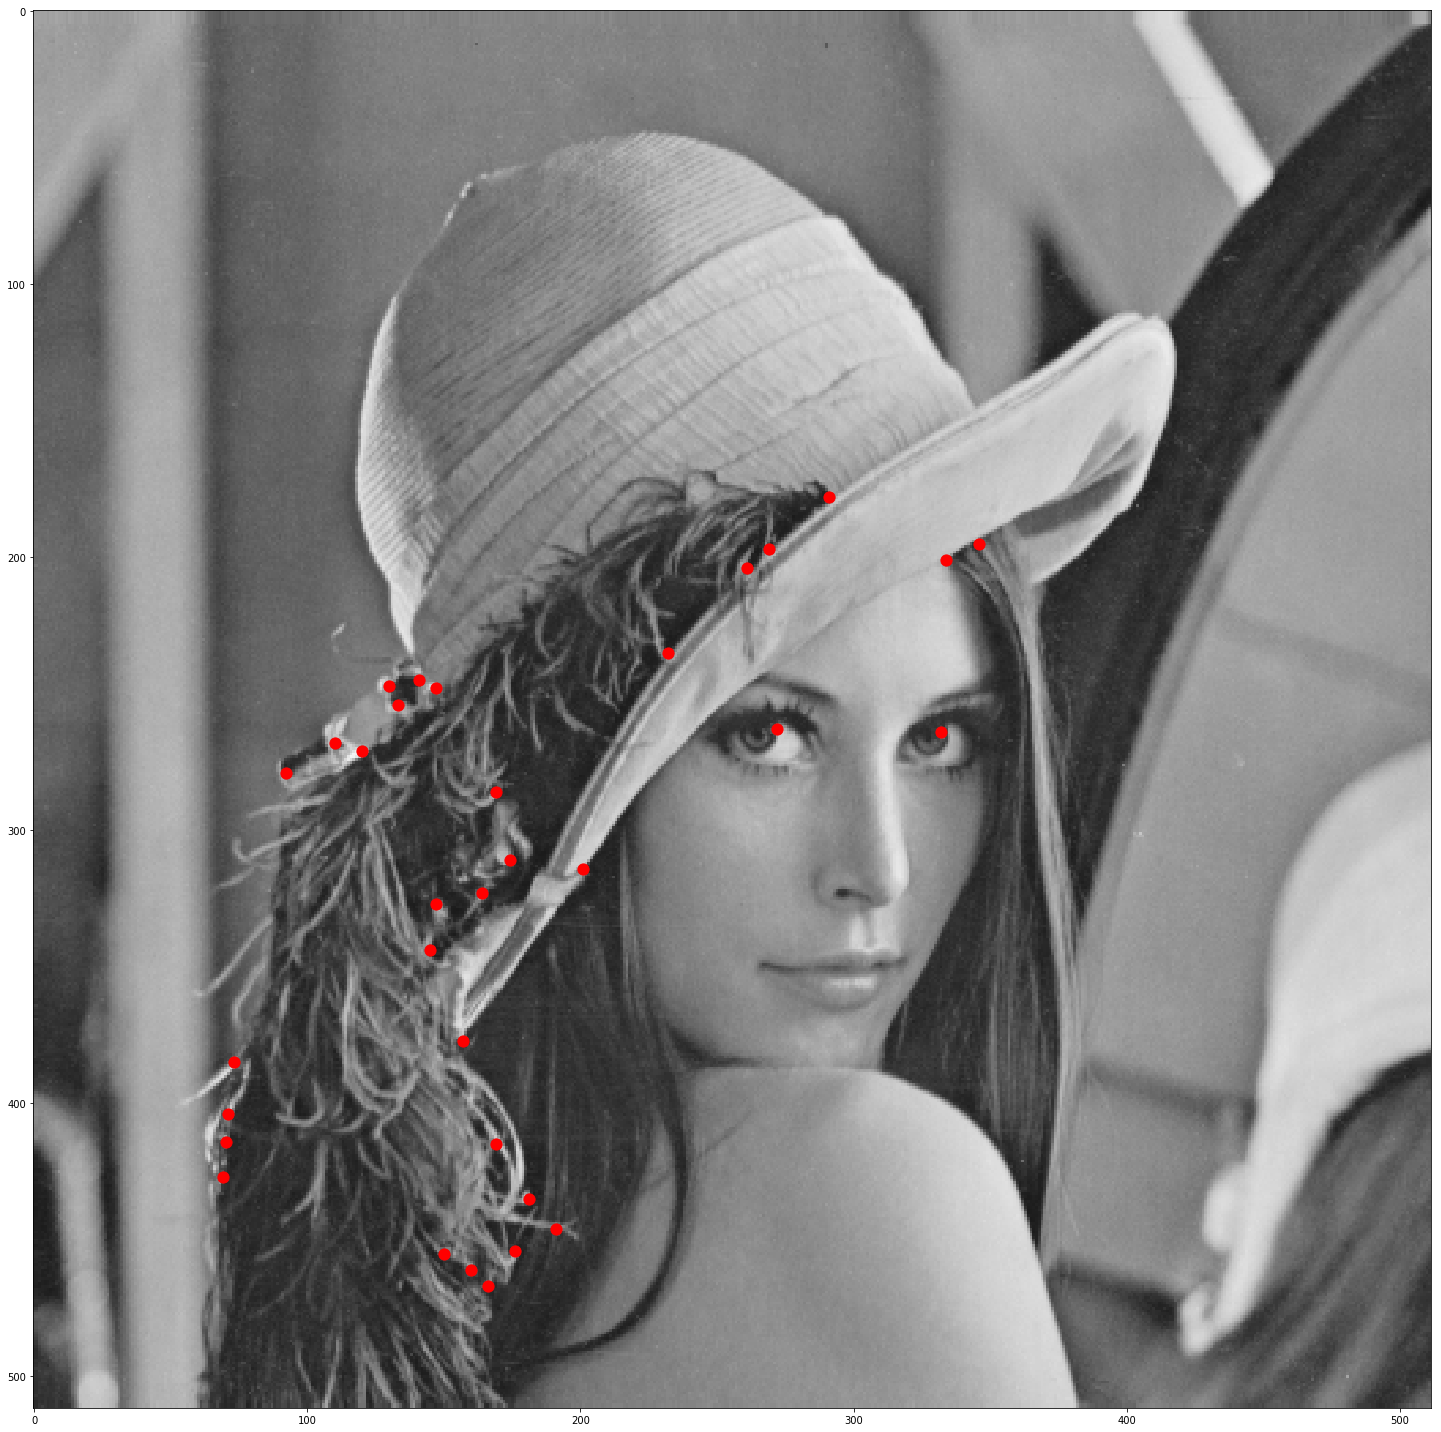

In [12]:
theorical_lena = corner_peaks(corner_harris(lena), min_distance = 5);
plt.figure(figsize = (20, 20));
plt.scatter(theorical_lena[:, 1], theorical_lena[:, 0], color = 'r', marker= ".", s = 500);
imshow(lena);

Number of corners : 326
Number of refined corners : 50


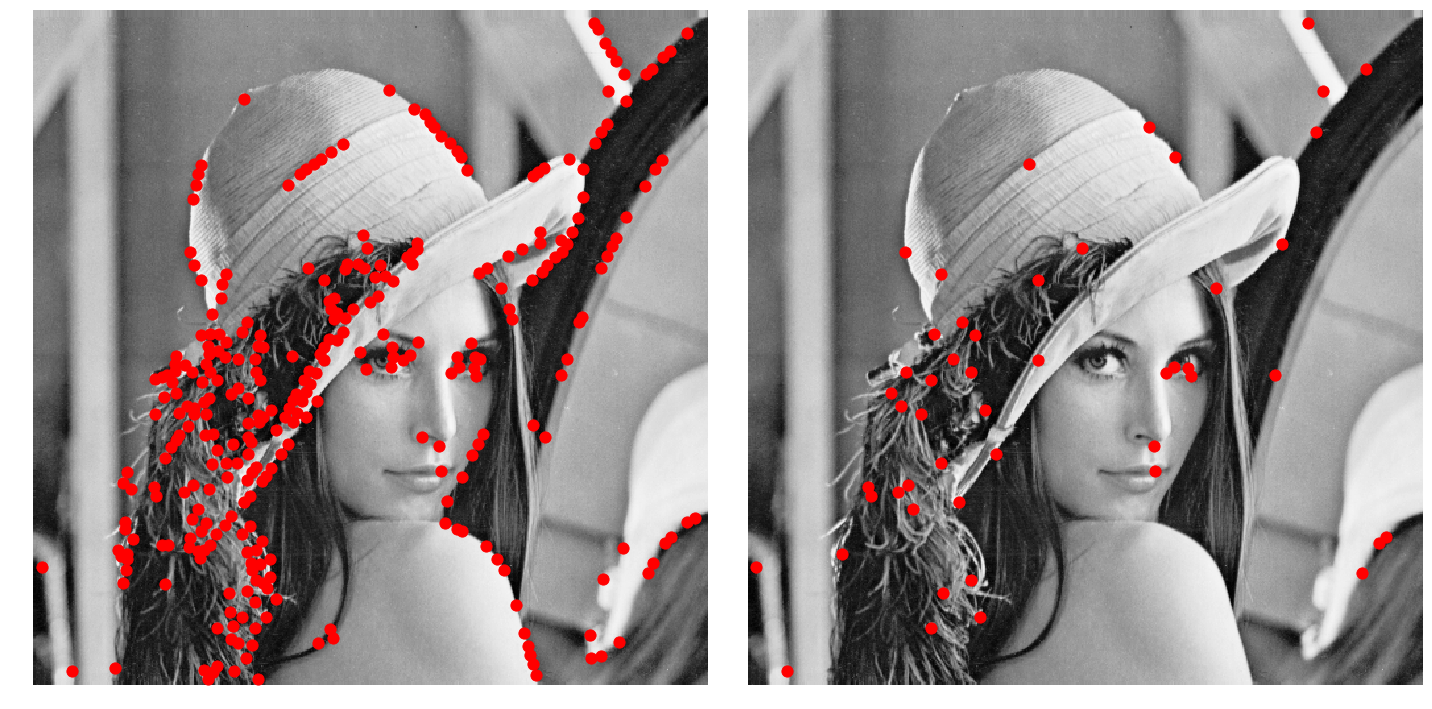

In [41]:
gen_plot(lena, "1_lena")

## Nimes

Number of corners : 390
Number of refined corners : 50


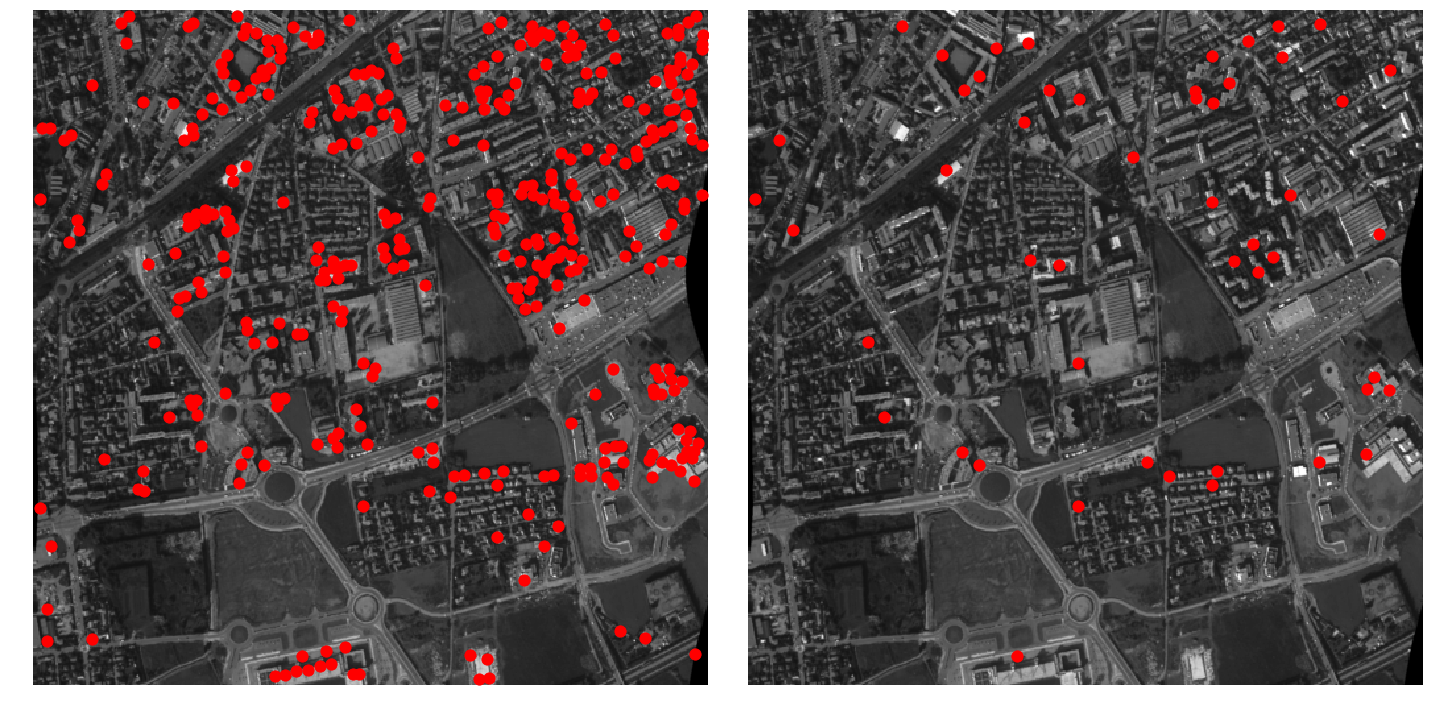

In [42]:
nimes = imread('images/nimes.pgm')
gen_plot(nimes, "1_nimes")

## Cameramn

Number of corners : 156
Number of refined corners : 50


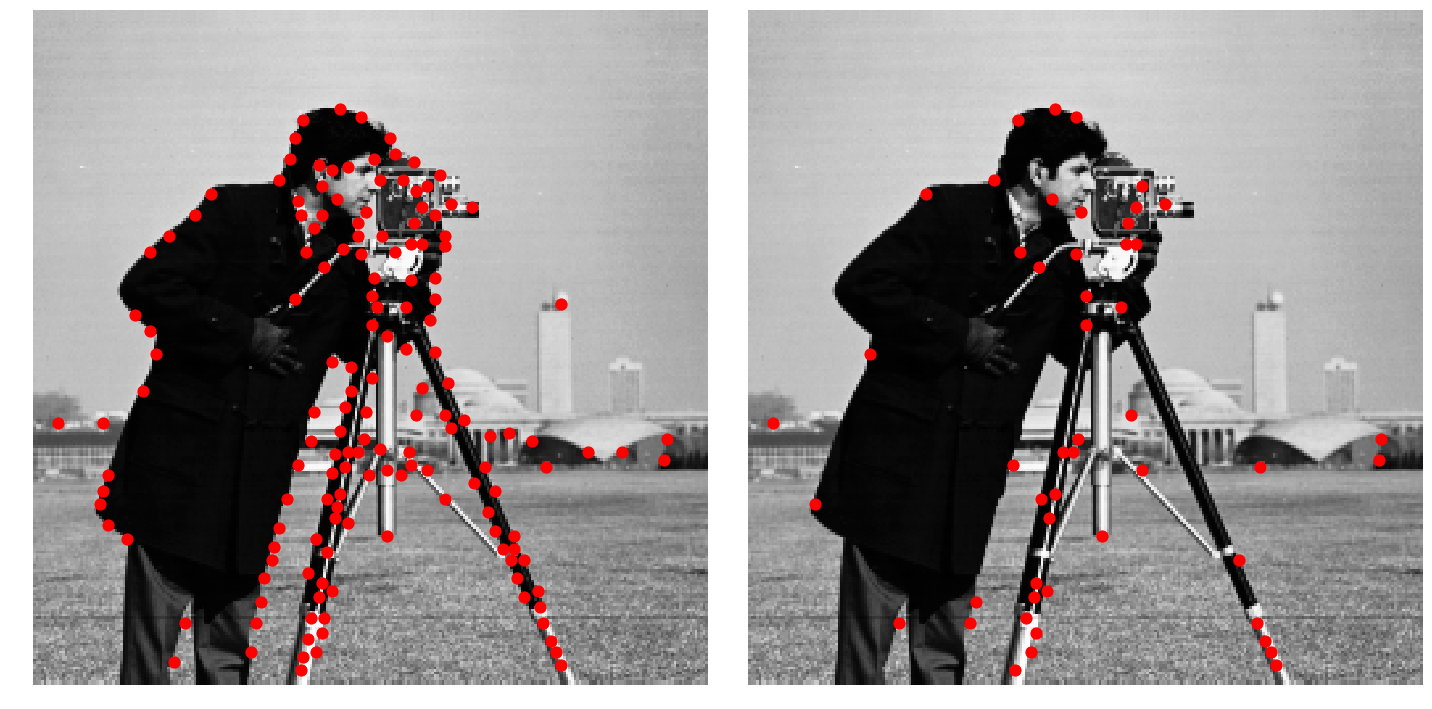

In [43]:
cameraman = imread('images/cameraman.pgm')
gen_plot(cameraman, "1_cameraman")

## Room

Number of corners : 407
Number of refined corners : 50


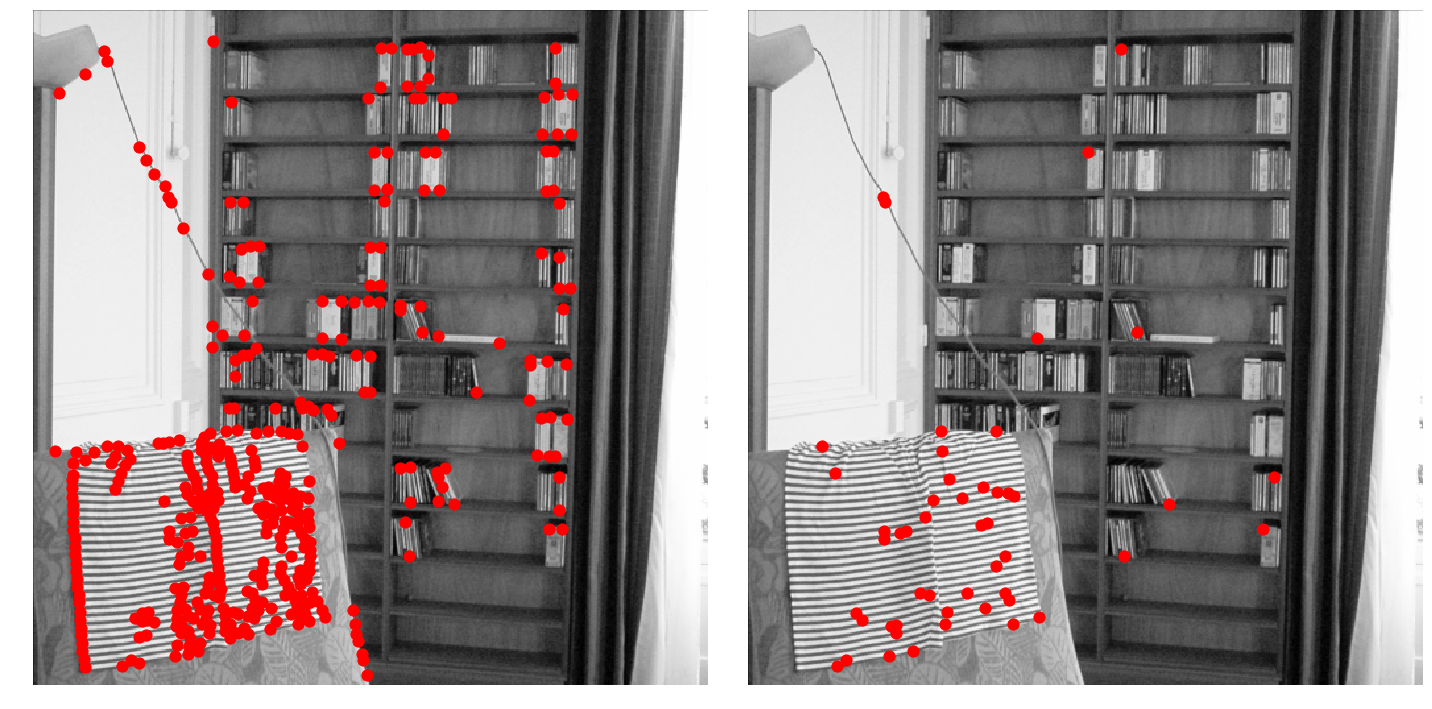

In [44]:
room = imread('images/room.pgm')
gen_plot(room, "1_room")

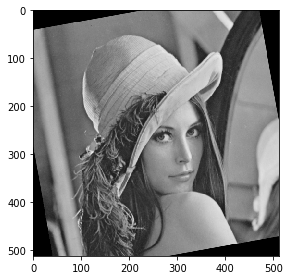

In [52]:
rotated = skimage.transform.rotate(lena, 10)
imshow(rotated);

[[ -7.44643948e-29  -1.74098410e-27  -3.76738298e-26 ...,  -3.00630805e-30
   -1.68473177e-30  -9.25834067e-31]
 [ -1.29959555e-28  -3.00496313e-27  -6.43109628e-26 ...,  -6.50309515e-29
   -3.68556511e-29  -2.04805750e-29]
 [ -2.21913276e-28  -5.07277714e-27  -1.07331715e-25 ...,  -1.30189053e-27
   -7.46181356e-28  -4.19292845e-28]
 ..., 
 [ -7.80796156e-27  -1.38777166e-26  -2.42624892e-26 ...,  -6.56008704e-25
   -3.50711117e-26  -1.73523048e-27]
 [ -4.02633590e-28  -7.24061822e-28  -1.28126567e-27 ...,  -3.87627033e-25
   -2.04812153e-26  -1.00151488e-27]
 [ -1.92162369e-29  -3.49656056e-29  -6.26270589e-29 ...,  -2.25457913e-25
   -1.17758648e-26  -5.69199277e-28]]
Number of corners : 105
Number of refined corners : 50


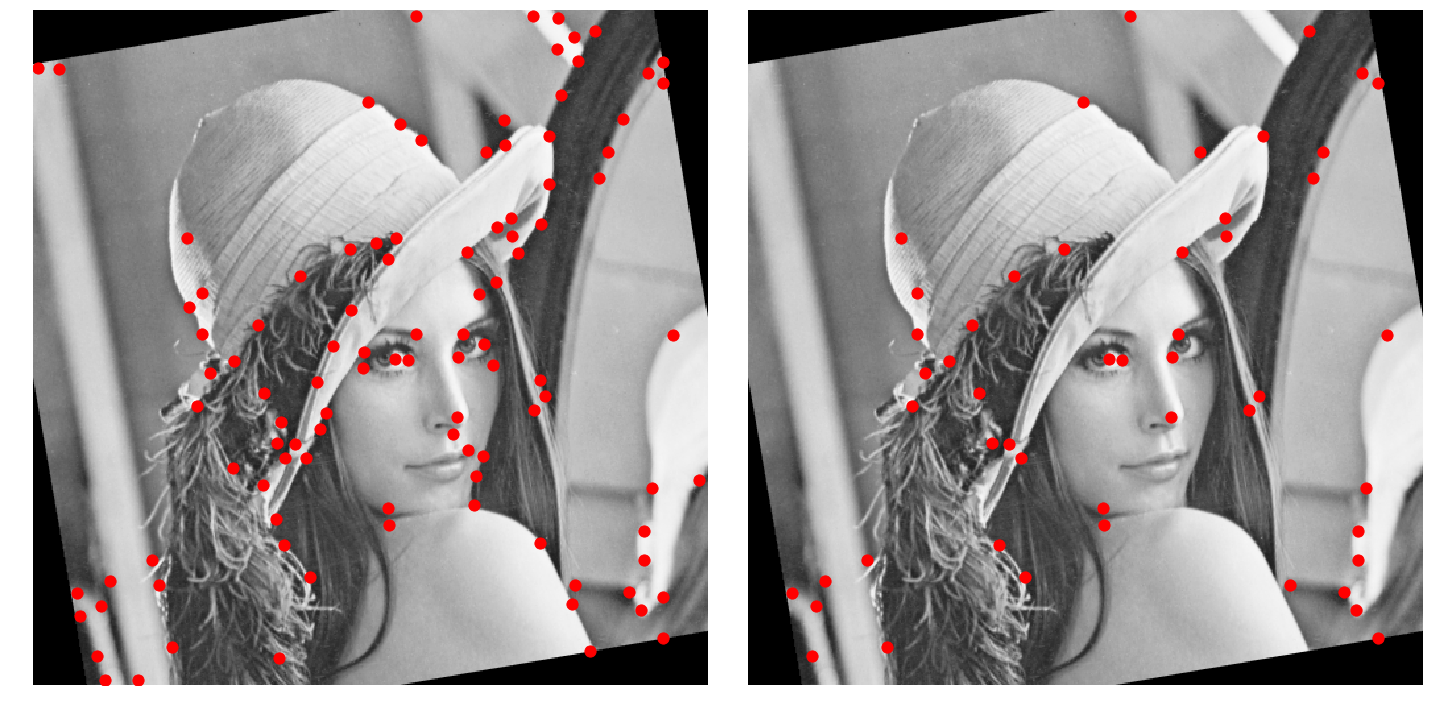

In [58]:
gen_plot(skimage.transform.rotate(lena, 10), "1_lena_rotated_100")

## Différents paramètres